#### Узорак с неједнаким вероватноћама
Иван Дамњановић
github.com/EngineerID
English Title: Sampling with Unequal Probabilities

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats # for linear regression

In [20]:
# Load the enhanced combined stock data
data = pd.read_csv('../data-output/enhanced_combined_stock_data.csv')

# Ensure that 'Date' is a datetime type
data['Date'] = pd.to_datetime(data['Date'])

In [21]:
# Basic descriptive statistics of the sampled data
sampled_data_stats = data.describe()
print(sampled_data_stats)

                                Date        Close         High          Low  \
count                           3018  3018.000000  3018.000000  3018.000000   
mean   2021-12-30 11:57:08.230616320   191.477187   194.378109   188.402670   
min              2020-01-02 00:00:00    24.081333    26.990667    23.367332   
25%              2020-12-30 00:00:00   117.435785   118.897420   115.755210   
50%              2021-12-29 12:00:00   196.548264   200.391197   193.199933   
75%              2022-12-29 00:00:00   258.392006   261.785660   253.733455   
max              2023-12-29 00:00:00   409.970001   414.496674   405.666656   
std                              NaN    86.878052    88.164400    85.556693   

              Open        Volume  Daily Return  Normalized Close   Volatility  
count  3018.000000  3.018000e+03   3015.000000       3018.000000  2928.000000  
mean    191.434803  6.440524e+07      0.001702          3.516254     0.026439  
min      24.980000  6.936000e+06     -0.210628  

In [22]:
full_data_stats = data.describe()
print(full_data_stats)

                                Date        Close         High          Low  \
count                           3018  3018.000000  3018.000000  3018.000000   
mean   2021-12-30 11:57:08.230616320   191.477187   194.378109   188.402670   
min              2020-01-02 00:00:00    24.081333    26.990667    23.367332   
25%              2020-12-30 00:00:00   117.435785   118.897420   115.755210   
50%              2021-12-29 12:00:00   196.548264   200.391197   193.199933   
75%              2022-12-29 00:00:00   258.392006   261.785660   253.733455   
max              2023-12-29 00:00:00   409.970001   414.496674   405.666656   
std                              NaN    86.878052    88.164400    85.556693   

              Open        Volume  Daily Return  Normalized Close   Volatility  
count  3018.000000  3.018000e+03   3015.000000       3018.000000  2928.000000  
mean    191.434803  6.440524e+07      0.001702          3.516254     0.026439  
min      24.980000  6.936000e+06     -0.210628  

In [23]:
# Calculate probabilities based on volatility (higher volatility means higher probability)
volatility = data.groupby('Ticker')['Volatility'].mean()

# Normalize the volatility values to create probabilities for sampling
probabilities = volatility / volatility.sum()

# Display the probabilities (optional)
print(probabilities)

Ticker
GOOG    0.253331
MSFT    0.239175
TSLA    0.507494
Name: Volatility, dtype: float64


In [24]:
# Sample data points using these probabilities
sampled_data = data.groupby('Ticker').apply(
    lambda x: x.sample(n=10, weights=x['Ticker'].map(probabilities), random_state=42)
)

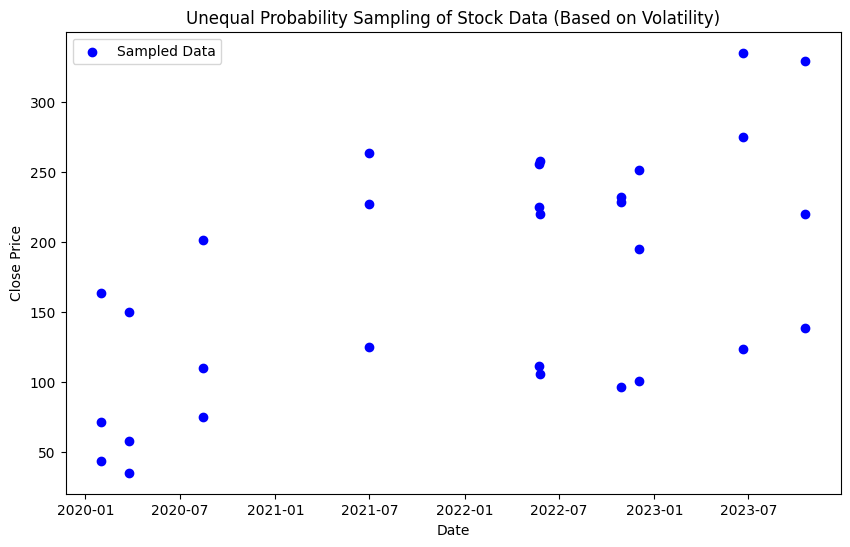

<Figure size 640x480 with 0 Axes>

In [ ]:
# Visualize the sampled data
plt.figure(figsize=(10, 6))
plt.scatter(sampled_data['Date'], sampled_data['Close'], c='blue', label='Sampled Data')
plt.title('Unequal Probability Sampling of Stock Data (Based on Volatility)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()
plt.savefig("../graphs/Unequal Probability Sampling of Stock Data (Based on Volatility)")


In [26]:
# Mean returns for sampled data
unequal_returns = sampled_data['Daily Return']

# Mean returns for the full data
full_returns = data['Daily Return']

# Perform a t-test to compare mean returns
t_stat, p_value = stats.ttest_ind(unequal_returns.dropna(), full_returns.dropna())
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 1.2495103521458093, P-value: 0.21157456644107717


In [27]:
# Estimate risk for the sampled data (e.g., using standard deviation of returns)
risk_sampled = sampled_data['Daily Return'].std()
print(f"Risk (Standard Deviation) of Sampled Data: {risk_sampled}")


Risk (Standard Deviation) of Sampled Data: 0.029809874189929756
